In [3]:
!pip install lifelines
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
import lifelines

In [4]:
churn_data = pd.read_csv('ISSS603-Customer Analytics and Applications/Company X/compx_churn.csv')
# transform tenure and churn features
churn_data['Tenure'] = churn_data['Tenure'].astype(float)
churn_data['Churn'] = churn_data['Churn'] == 'Yes'
churn_data['CUSTOMER CODE'] = churn_data['CUSTOMER CODE'].str.replace(r'ALF', '').astype(int)
churn_data['STATUS'] = churn_data['STATUS'].str.replace(r'\d\d*\. ', '')
churn_data['SEGMENT'] = churn_data['SEGMENT'].replace('0', 'NA')
churn_data['INDUSTRY'] = churn_data['INDUSTRY'].replace(['OTHERS', '0'], 'OTHERS1')

churn_data.head()

C:\Users\prach\AppData\Local\Temp/ipykernel_15340/3251100031.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  churn_data['STATUS'] = churn_data['STATUS'].str.replace(r'\d\d*\. ', '')


,CUSTOMER CODE,STATUS,SALES PERSON,SALES CHANNEL,INDUSTRY,SEGMENT,SUB-SEGMENT,Tenure,Churn
0,1,PROSPECT,AF,GLOBAL KEY ACCOUNT,OTHERS1,NA,0,1.0,False
1,2,CUSTOMER,FX,OTHERS,FOODSERVICE,RESTAURANT,CHINESE,1.0,False
2,3,CUSTOMER,LS,OTHERS,FOODSERVICE,RESTAURANT,JAPANESE / KOREAN,3.0,True
3,4,CUSTOMER,LS,OTHERS,FOODSERVICE,RESTAURANT,WESTERN,1.0,False
4,5,CUSTOMER,FX,OTHERS,FOODSERVICE,BAKERY,0,2.0,True


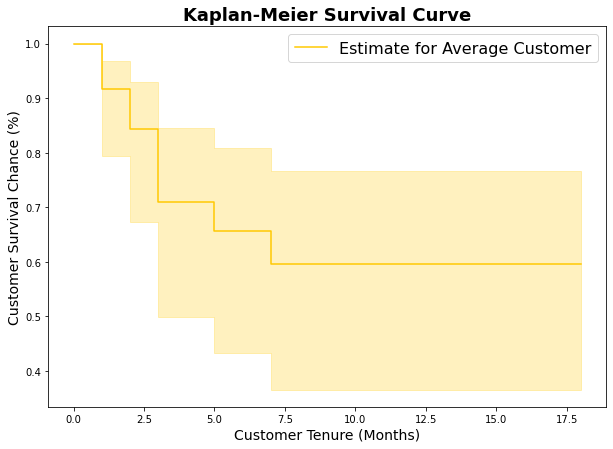

In [29]:
# fitting kmf to churn data
t = churn_data['Tenure'].values
churn = churn_data['Churn'].values
kmf = lifelines.KaplanMeierFitter()
kmf.fit(t, event_observed=churn, label='Estimate for Average Customer')# plotting kmf curve
fig, ax = plt.subplots(figsize=(10,7))
kmf.plot(ax=ax)
ax.set_title('Kaplan-Meier Survival Curve', fontsize = 18, fontweight = 'bold')
ax.set_xlabel('Customer Tenure (Months)', fontsize = 14)
ax.set_ylabel('Customer Survival Chance (%)', fontsize = 14)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#FFC900", "#F77803", "#CE004E", "#4F003F", "#809600", "#7F7F7F", "#AF8C01"])
plt.legend(fontsize=16)
plt.show()

In [6]:
ohe_features = ['STATUS', 'SALES PERSON', 'SALES CHANNEL', 'INDUSTRY', 'SEGMENT']
churn_hazard = pd.get_dummies(churn_data, 
                              drop_first=True,
                              columns=ohe_features)
features_to_drop = ['CUSTOMER CODE', 'SUB-SEGMENT']
churn_hazard = churn_hazard.drop(features_to_drop, axis=1)

In [7]:
churn_hazard.head()

,Tenure,Churn,STATUS_DROP,STATUS_LEAD,STATUS_PROSPECT,SALES PERSON_FX,SALES PERSON_LS,SALES CHANNEL_GLOBAL KEY ACCOUNT,SALES CHANNEL_OTHERS,SALES CHANNEL_SG DISTRIBUTOR,...,SEGMENT_CHARITY,SEGMENT_MARKETPLACE,SEGMENT_NA,SEGMENT_PACKAGED FOOD,SEGMENT_RESTAURANT,SEGMENT_STAPLES,SEGMENT_SUPPLEMENTS,SEGMENT_TREATS,SEGMENT_WEBSITE,SEGMENT_WHOLESALER
0,1.0,False,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1.0,False,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,3.0,True,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,False,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2.0,True,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
cph = lifelines.CoxPHFitter(penalizer=0.1)
cph.fit(churn_hazard, duration_col='Tenure', event_col='Churn', show_progress=False)
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 48 total observations, 37 right-censored observations>
             duration col = 'Tenure'
                event col = 'Churn'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 48
number of events observed = 11
   partial log-likelihood = -28.03
         time fit was run = 2022-11-01 13:14:30 UTC

---
                                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                
STATUS_DROP                        0.67       1.96       1.08            -1.45             2.79                 0.23                16.32
STATUS_LEAD                       -0.28       0.75       2.80            -5.78             5.21                 0.00               183.65
STATUS_PROSPECT                    0.10       1.10       0.85            -1.57             1.77                 0.21                 5.88
SALES PERSON_FX                    1.15       3.15       1.32            -1.44             3.74                 0.24                41.97
SALES PERSON_LS                    0.55       1.74       0.76            -0.94             2.05                 0.39                 7.78
SALES CHANNEL_GLOBAL KEY ACCOUNT   0.93       2.53       1.12            -1.27             3.13                 0.28                22.90
SALES CHANNEL_OTHERS               0.39       1.48       0.73            -1.04             1.82                 0.35                 6.17
SALES CHANNEL_SG DISTRIBUTOR      -1.18       0.31       1.18            -3.49             1.14                 0.03                 3.12
SALES CHANNEL_SG KEY ACCOUNT      -0.49       0.61       0.88            -2.21             1.23                 0.11                 3.42
SALES CHANNEL_SG ONLINE           -0.64       0.53       1.66            -3.90             2.62                 0.02                13.68
INDUSTRY_ECOM                     -0.62       0.54       1.95            -4.45             3.20                 0.01                24.46
INDUSTRY_FOODSERVICE               0.19       1.21       0.75            -1.27             1.66                 0.28                 5.23
INDUSTRY_MANUFACTURER              0.09       1.09       0.86            -1.60             1.77                 0.20                 5.88
INDUSTRY_MARKETPLACE              -0.61       0.54       2.64            -5.78             4.56                 0.00                95.14
INDUSTRY_OTHERS1                  -0.64       0.52       1.24            -3.07             1.78                 0.05                 5.95
INDUSTRY_RETAIL                    0.58       1.79       1.55            -2.47             3.63                 0.08                37.62
SEGMENT_B2B INGREDIENT            -0.32       0.72       2.77            -5.74             5.10                 0.00               163.36
SEGMENT_B2C                        0.92       2.50       1.27            -1.56             3.40                 0.21                29.89
SEGMENT_BAKERY                     0.27       1.31       1.28            -2.23             2.78                 0.11                16.10
SEGMENT_CATERING                  -0.62       0.54       2.51            -5.55             4.30                 0.00                73.69
SEGMENT_CHARITY                   -0.82       0.44       2.45            -5.62             3.98                 0.00                53.69
SEGMENT_MARKETPLACE               -0.62       0.54       1.95            -4.45             3.20                 0.01                24.46
SEGMENT_NA                         0.22       1.25       0.80            -1.35             1.80                 0.26                 6.02
SEGMENT_PACKAGED FOOD             -0.61       0.54       2.55            -5.61             4.38                 0.00                

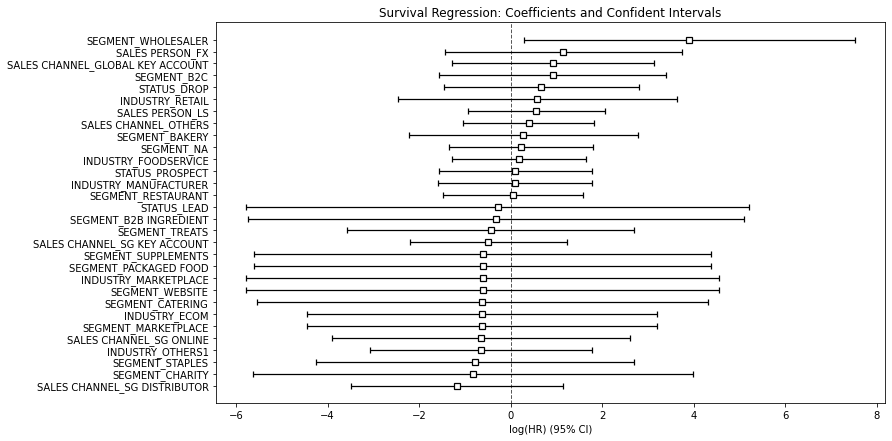

In [9]:
# plotting coefficients
fig_coef, ax_coef = plt.subplots(figsize=(12,7))
ax_coef.set_title('Survival Regression: Coefficients and Confident Intervals')
cph.plot(ax=ax_coef);

In [10]:
# function for creating Kaplan-Meier curve plots segmented
# by categorical variables
def plot_categorical_survival(feature, t='Tenure', event='Churn', df=churn_data, ax=None):
    for cat in df[feature].unique():
        idx = df[feature] == cat
        kmf = lifelines.KaplanMeierFitter()
        kmf.fit(df[idx][t], event_observed=df[idx][event], label=cat)
        kmf.plot(ax=ax, label=cat)

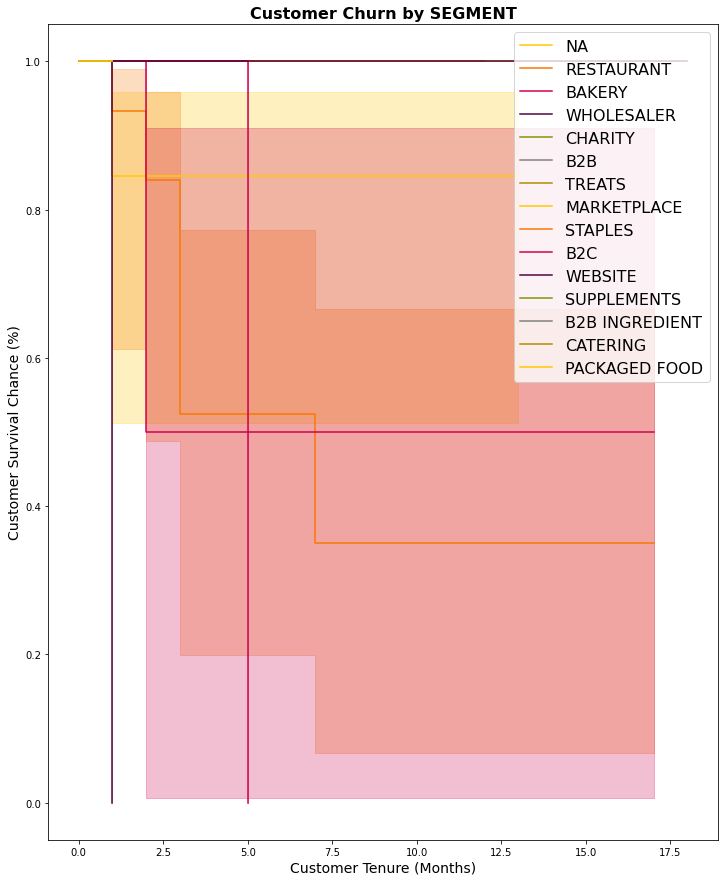

In [32]:
fig_seg, ax_seg = plt.subplots(figsize=(12,15))
plot_categorical_survival(feature='SEGMENT', ax=ax_seg)
ax_seg.set_title('Customer Churn by SEGMENT', fontsize = 16, fontweight = 'bold')
ax_seg.set_xlabel('Customer Tenure (Months)', fontsize = 14)
ax_seg.set_ylabel('Customer Survival Chance (%)', fontsize = 14)
plt.legend(fontsize=16, loc=1)
plt.show()

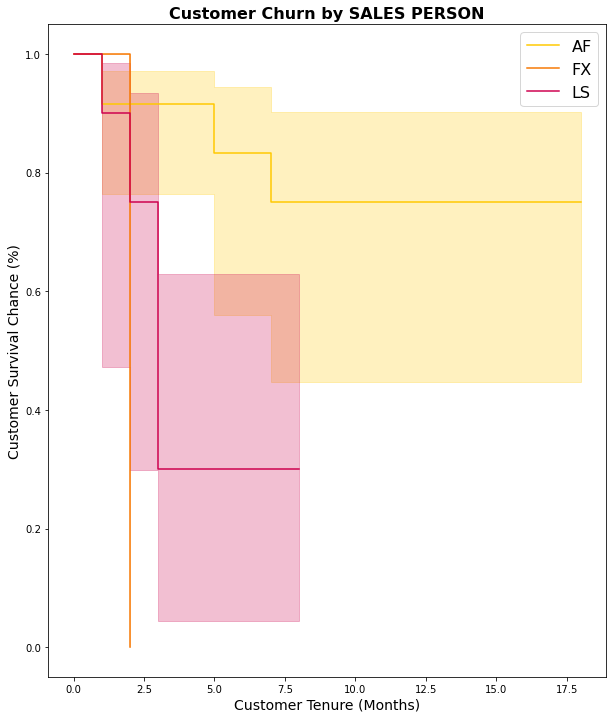

In [34]:
fig_slp, ax_slp = plt.subplots(figsize=(10,12))
plot_categorical_survival(feature='SALES PERSON', ax=ax_slp)
ax_slp.set_title('Customer Churn by SALES PERSON',fontsize = 16, fontweight = 'bold')
ax_slp.set_xlabel('Customer Tenure (Months)', fontsize = 14)
ax_slp.set_ylabel('Customer Survival Chance (%)', fontsize = 14)
plt.legend(fontsize=16, loc=1)
plt.show()

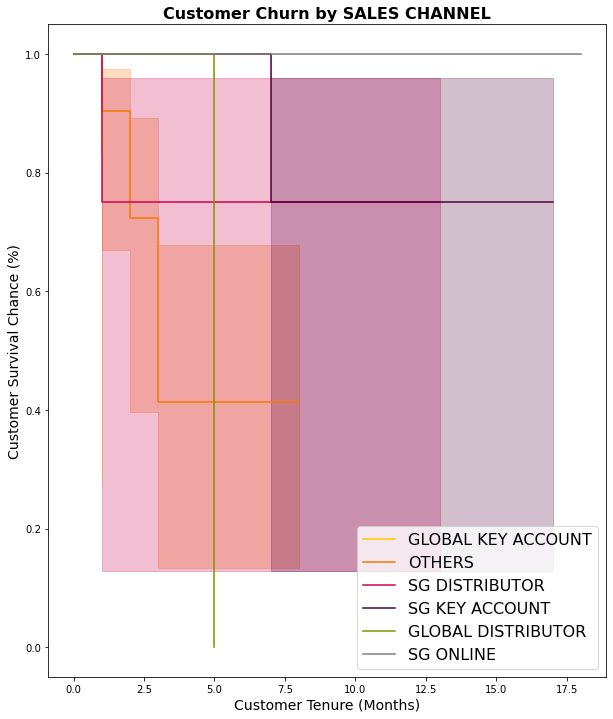

In [36]:
fig_slc, ax_slc = plt.subplots(figsize=(10,12))
plot_categorical_survival(feature='SALES CHANNEL', ax=ax_slc)
ax_slc.set_title('Customer Churn by SALES CHANNEL', fontsize = 16, fontweight = 'bold')
ax_slc.set_xlabel('Customer Tenure (Months)', fontsize = 14)
ax_slc.set_ylabel('Customer Survival Chance (%)', fontsize = 14)
plt.legend(fontsize=16, loc=4)
plt.show()

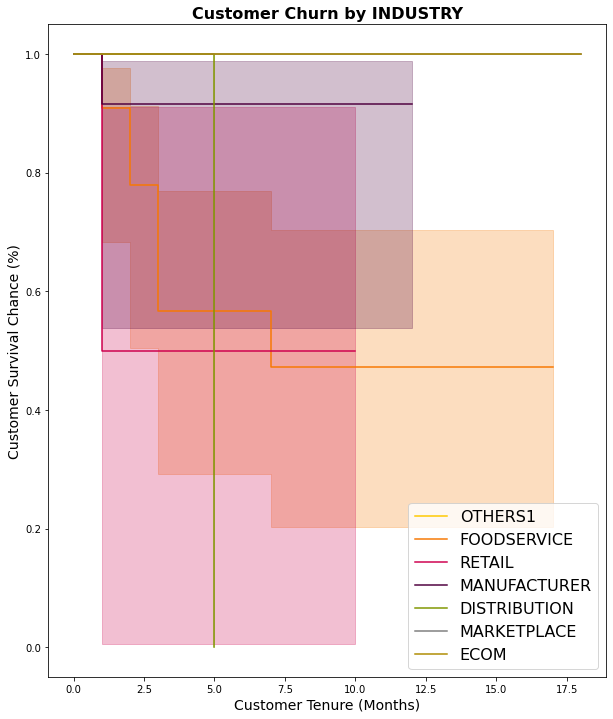

In [37]:
fig_ind, ax_ind = plt.subplots(figsize=(10,12))
plot_categorical_survival(feature='INDUSTRY', ax=ax_ind)
ax_ind.set_title('Customer Churn by INDUSTRY', fontsize = 16, fontweight = 'bold')
ax_ind.set_xlabel('Customer Tenure (Months)', fontsize = 14)
ax_ind.set_ylabel('Customer Survival Chance (%)', fontsize = 14)
plt.legend(fontsize=16, loc=4)
plt.show()

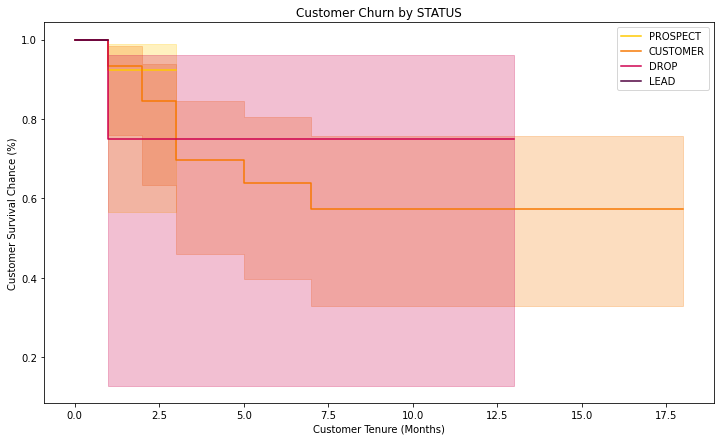

In [15]:
fig_sts, ax_sts = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='STATUS', ax=ax_sts)
ax_sts.set_title('Customer Churn by STATUS')
ax_sts.set_xlabel('Customer Tenure (Months)')
ax_sts.set_ylabel('Customer Survival Chance (%)')
plt.show()